# (1) Title Page: title, group members, course and date

# (2) Introduction
Start with relevant background information on the topic to prepare those unfamiliar for the rest of your proposal. Motivate the question you are about to add.

Formulate one or two questions for investigation indicating if the primary goal is inference or prediction. Make sure that the question(s) can be answer with the data available. For example, you won't be able to quantify the "effect of X on Y" or "the influence of X on Y" or "how X affects Y" using the methods learned in class and observational data.

If available, align your question/objectives with the existing literature on the topic. You can add a reference to a scientific publication if available and listed in the References section (not mandatory). 

The restaurant industry is highly competitive, with revenue influenced by various factors such as customer volume, pricing strategies, and marketing efforts. Understanding these relationships is crucial for business owners to optimize operations and maximize profits. 

There are already existing studies on how individual predictors are related to restaurant revenue. For example, Chen & Kim (2020) found that promotions could increase foot traffic (+18%) but would often erode long-term profitability (−7%). In a 2022 paper, Lee & Patel noted that dynamic menu pricing (e.g., surge pricing during peak hours) boosted revenue by 12% but risked customer dissatisfaction.

While these studies have examined individual factors affecting restaurant performance (Smith et al., 2023), few have explored their combined predictive power using simulated data to avoid real-world noise. Therefore, our research question is: Can we use predictors given in the simulated dataset (i.e., Number_of_Customers, Menu_Price, Marketing_Spend, Cuisine_Type, Average_Customer_Spending, and Promotions) to predict monthly restaurant revenue? 

# (3) Methods and Results
In this section, you will include the following subsections:

## a) Data

read the data into R using reproducible code (i.e., from an open source and not a local directory in your server or computer)
include a citation of its source
include any information you have about data collection (e.g., observational vs experimental)
describe the variables as done in assignment 1
if (absolutely) needed, indicate which variables will be pre-selected (or dropped) and provide a clear justification of your selection. Unless needed, you should use data-driven methods to select variables.

In [7]:
library(tidyverse)    # Core (includes dplyr, ggplot2, tidyr, etc.)
library(broom)        # For tidy model outputs (e.g., `tidy(AIC_back)`)
library(MASS)         # For `stepAIC()` (backward model selection)
library(tidymodels)   # For `initial_split()` (train/test split)
library(ggplot2)      # For all visualizations (already in tidyverse)
library(gridExtra)    # For `grid.arrange()` (combining plots)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1     ✔ rsample      1.2.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_c

In [8]:
# read the data into R, assigned to the dataset name revenue
revenue <- read_csv("https://raw.githubusercontent.com/athuwyl/dsci301/main/Restaurant_revenue%20(1).csv") 

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Cuisine_Type
dbl (7): Number_of_Customers, Menu_Price, Marketing_Spend, Average_Customer_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
head(revenue)

Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
61,43.11764,12.663793,Japanese,36.23613,0,45,350.9120
24,40.02008,4.577892,Italian,17.95256,0,36,221.3191
81,41.98149,4.652911,Japanese,22.60042,1,91,326.5298
70,43.00531,4.416053,Italian,18.98410,1,59,348.1906
30,17.45620,3.475052,Italian,12.76614,1,30,185.0091
92,19.42767,13.114473,American,43.09995,1,10,399.8675


The Restaurant Revenue Prediction Dataset is a simulated dataset created using Python and NumPy to mimic real-world restaurant operations. It focuses on forecasting monthly revenue for a set of imaginary restaurants. It offers a diverse range of features designed to mimic the factors influencing real-world restaurant performance. 

- number of observations: 1000 

- number of variables: 8

- name and type of variables:

    - Number_of_Customers      : numeric - double
    - Menu_Price               : numeric - double
    - Marketing_Spend          : numeric - double
    - Cuisine_Type             : character 
    - Average_Customer_Spending: numeric - double
    - Promotions               : numeric - double
    - Reviews                  : numeric - double
    - Monthly_Revenue          : numeric - double

- citation: MrSimple07. (2024). Restaurants Revenue Prediction [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/7420974

We will remove the predictor Reviews because it might be intentionally manipulated not to reflect the true quality of the restaurant, and Garcia et al. (2021) found that fake reviews could skew predictions. All the other predictors will be selected using the stepwise algorithm. 

## b) Exploratory Data Analysis (EDA)

Clean and wrangle your data into a tidy format (review Tidyverse's style guide Links to an external site.if needed)
Include 2 effective and creative visualizations 
explore the association of some potential explanatory variables with the response (use colours, point types, point size and/or faceting to include more variables)
highlight potential problems (e.g., multicollinearity or outliers)
Transform some variables if needed and include a clear explanation (e.g. log-transformation may be useful when outliers are present)
Any summary tables that are relevant to your analysis (e.g., summarize number of observation in groups, indicate if NAs exist)
Be sure not to print output that takes up a lot of screen space!
Your EDA must be comprehensive with high quality plots.

In [24]:
# Wrangle the data into a tidy format

revenue_new <- revenue %>% 
            na.omit() %>% # omit any missing value; since this is a simulated data, we assume that missing values are missed randomly
            mutate(Promotions = as.factor(Promotions), # change Promotions from type double to factor for analysis
                  Cuisine_Type = as.factor(Cuisine_Type)) # change Cuisine_Type from type character to factor for analysis
            
revenue_new <- revenue_new %>% 
               dplyr::select(-Reviews) # Remove the variable I don't need
            
head(revenue_new)

Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
61,43.11764,12.663793,Japanese,36.23613,0,350.9120
24,40.02008,4.577892,Italian,17.95256,0,221.3191
81,41.98149,4.652911,Japanese,22.60042,1,326.5298
70,43.00531,4.416053,Italian,18.98410,1,348.1906
30,17.45620,3.475052,Italian,12.76614,1,185.0091
92,19.42767,13.114473,American,43.09995,1,399.8675


In [13]:
# Use str() to verify the dataset's structure (number of rows and columns)

str(revenue_new)

tibble [1,000 × 7] (S3: tbl_df/tbl/data.frame)
 $ Number_of_Customers      : num [1:1000] 61 24 81 70 30 92 96 84 84 97 ...
 $ Menu_Price               : num [1:1000] 43.1 40 42 43 17.5 ...
 $ Marketing_Spend          : num [1:1000] 12.66 4.58 4.65 4.42 3.48 ...
 $ Cuisine_Type             : Factor w/ 4 levels "American","Italian",..: 3 2 3 2 2 1 1 2 1 2 ...
 $ Average_Customer_Spending: num [1:1000] 36.2 18 22.6 19 12.8 ...
 $ Promotions               : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 2 1 1 ...
 $ Monthly_Revenue          : num [1:1000] 351 221 327 348 185 ...


In [11]:
# Examine the revenue column values

neg_rev <- revenue_new %>%
           filter(Monthly_Revenue < 0)

neg_rev # Note that sometimes the monthly revenue is negative, but since this is a simulated dataset, we would not dive into this

Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
11,32.62033,5.0611687,American,33.76198,1,-28.977809
10,11.31387,2.2791327,Italian,16.07545,1,-27.610276
17,22.45893,0.8747125,American,35.28077,1,-25.453430
13,36.13052,0.8111748,Mexican,43.11906,1,-28.920890
10,33.08741,6.0097877,American,15.33378,1,-7.627382


Here's a summary table of the dataset's key characteristics after wrangling:

### **Table 1: Dataset Summary Table**

| **Characteristic**       | **Value**                              | **Notes**                              |
|--------------------------|----------------------------------------|----------------------------------------|
| **Total Observations**   | 1,000                                  | Simulated restaurant records           |
| **Variables**            | 7                                      | 6 predictors + 1 response              |
| **Missing Values (NAs)** | 0                                      | Dataset was pre-cleaned with `na.omit()` |

### **Table 2: Variable Specifications**
| **Variable Name**               | **Type**    | **Description**                                                                 |
|---------------------------------|-------------|---------------------------------------------------------------------------------|
| `Number_of_Customers`           | numeric     | Daily customer count (continuous)                                               |
| `Menu_Price`                    | numeric     | Average price per menu item (continuous)                                        |
| `Marketing_Spend`               | numeric     | Monthly marketing budget in thousands (continuous)                              |
| `Cuisine_Type`                  | factor      | 4 levels: Italian, Japanese, Mexican, American                                 |
| `Average_Customer_Spending`     | numeric     | Mean spending per customer (continuous)                                         |
| `Promotions`                    | factor      | Binary (0 = No promotion, 1 = Promotion active)                                 |
| `Monthly_Revenue` (response)    | numeric     | Simulated revenue output (includes 5 negative values)                           |

### **Key Notes**
1. **Data Cleaning**: 
   - Removed `Reviews` variable due to potential manipulation bias.
   - Converted `Promotions` and `Cuisine_Type` to factors for analysis.

2. **Anomalies**: 
   - 5 records with negative `Monthly_Revenue` retained (simulation artifact).

We propose to generate scatter plots with a smoothed line visualizing the trend. 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


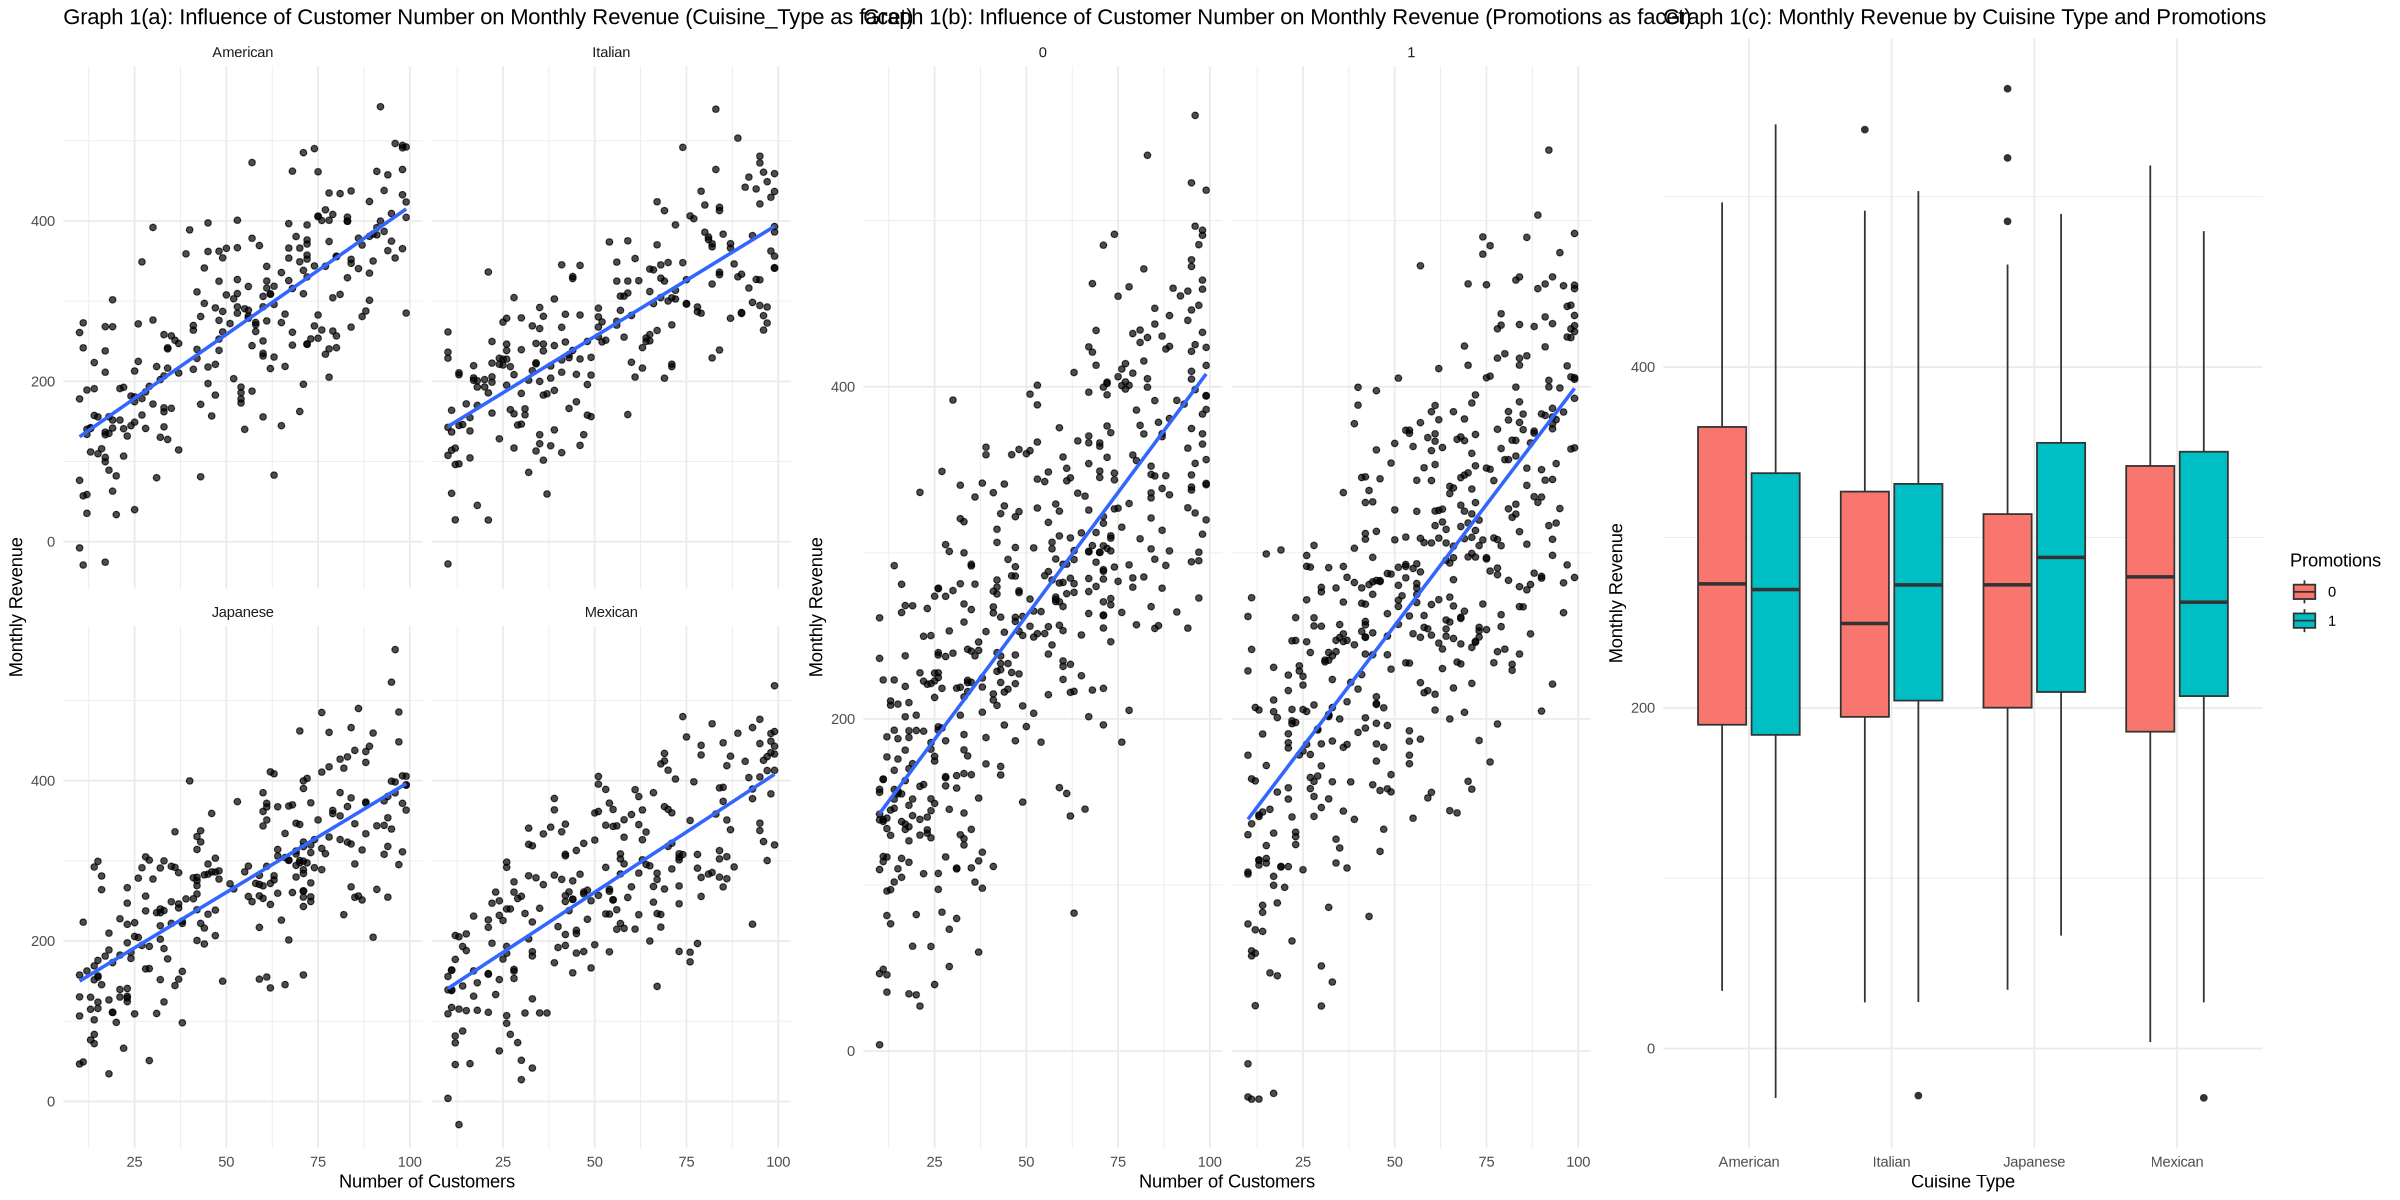

In [31]:
# Make plots wider 
options(repr.plot.width=20, repr.plot.height=10)

# Create the plot
p1 <- ggplot(revenue_new, aes(x = Number_of_Customers, y = Monthly_Revenue)) +
  geom_point(alpha = 0.7) +  # Scatter plot with transparency
  geom_smooth(method = "lm", linewidth = 1, se = FALSE, aes(group = 1)) +  # Linear trend line with `linewidth`
  facet_wrap(~ Cuisine_Type) +  # Separate plots by Cuisine_Type
  labs(
    title = "Graph 1(a): Influence of Customer Number on Monthly Revenue (Cuisine_Type as facet)",
    x = "Number of Customers",
    y = "Monthly Revenue") + 
  theme_minimal()  # Clean and minimal theme

p2 <- ggplot(revenue_new, aes(x = Number_of_Customers, y = Monthly_Revenue)) +
  geom_point(alpha = 0.7) +  # Scatter plot with transparency
  geom_smooth(method = "lm", linewidth = 1, se = FALSE, aes(group = 1)) +  # Linear trend line with `linewidth`
  facet_wrap(~ Promotions) +  # Separate plots by Cuisine_Type
  labs(
    title = "Graph 1(b): Influence of Customer Number on Monthly Revenue (Promotions as facet)",
    x = "Number of Customers",
    y = "Monthly Revenue") + 
  theme_minimal()  # Clean and minimal theme


# Create a boxplot to visualize the effect of Cuisine_Type and Promotions on Monthly_Revenue
p3 <- ggplot(revenue_new, aes(x = Cuisine_Type, y = Monthly_Revenue, fill = as.factor(Promotions))) +
  geom_boxplot() +
  labs(
    title = "Graph 1(c): Monthly Revenue by Cuisine Type and Promotions",
    x = "Cuisine Type",
    y = "Monthly Revenue",
    fill = "Promotions"
  ) +
  theme_minimal()

grid.arrange(p1, p2, p3, nrow = 1)

This plot is relevant in the sense that it explores whether there exists a positive linear relationship between Monthly_Revenue and Number_of_Customers, and whether the association between Monthly_Revenue and Number_of_Customers varies across different Cuisine_Type and Promotions; in other words, whether the effect of the number of customers visiting on monthly revenue will change based on cuisine types and the presence of promotion strategies.

The almost upward sloping line in each facet indicates a potentially significant positive relationship between Monthly_Revenue and Number_of_Customers, suggesting that Number_of_Customers might be a strong predictor. In addition, since the association doesn't seem to vary much across facets (in both cases), we should test whether an interactive model (categorical variable*continuous variable) is necessary.

Lastly, the boxplot suggests that Cuisine_Type could influence Monthly_Revenue, and Promotions do not always increase Monthly_Revenue, which is counter-intuitive (Promotions are assumed to increase Monthly_Revenue). However, whether these observations are significant is open to further analysis, including by adding other continuous variables in a multiple linear regression.

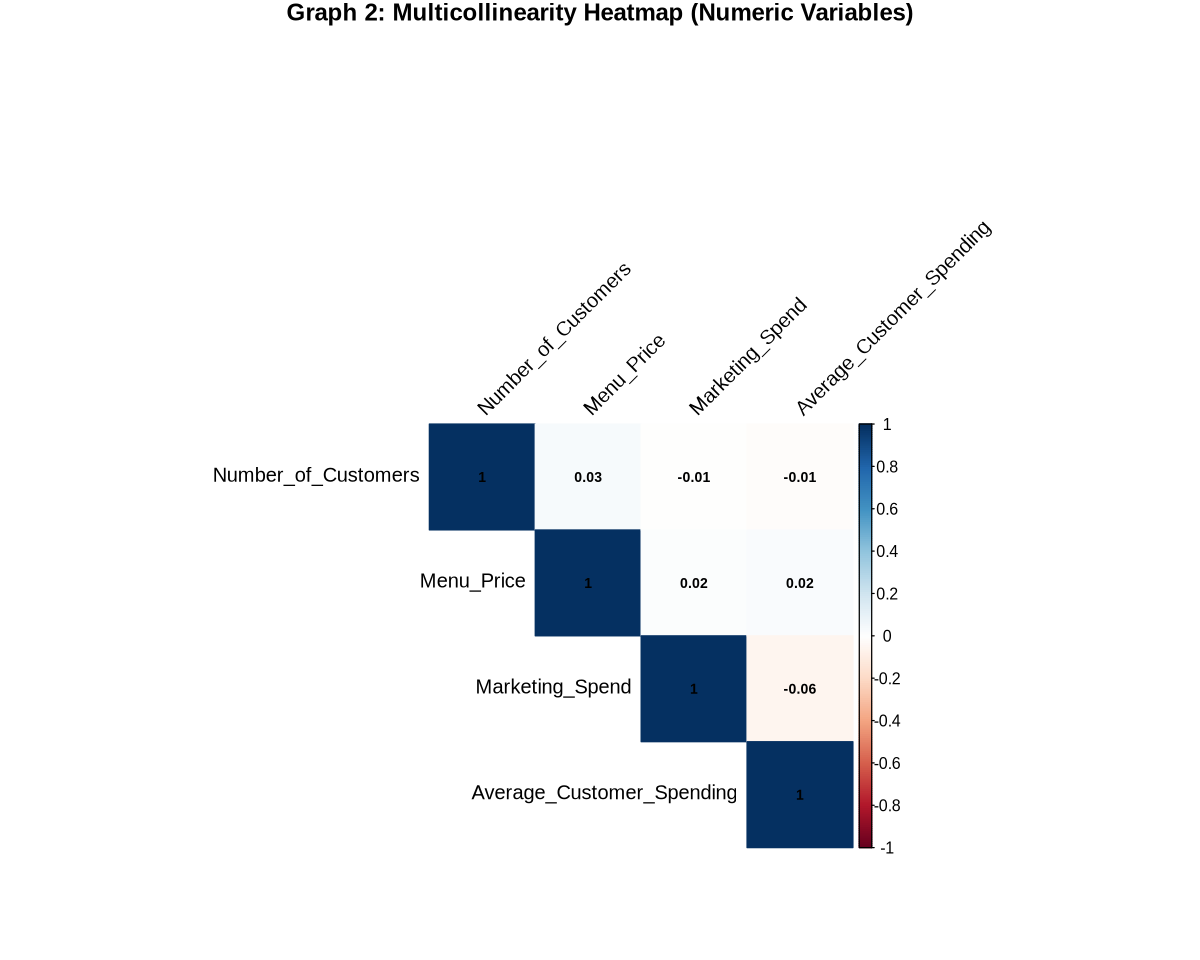

In [30]:
# Use a heatmap to check multicollinearity
library(corrplot)  # For heatmap visualization

options(repr.plot.width=10, repr.plot.height=8)

# 1. Select only numeric variables (exclude factors)
numeric_data <- revenue_new %>%
  dplyr::select(-c(Promotions, Cuisine_Type, Monthly_Revenue)) # Keeps: Number_of_Customers, Menu_Price, etc.

# 2. Calculate correlation matrix
cor_matrix <- cor(numeric_data)

# 3. Generate heatmap
corrplot(cor_matrix, 
         method = "color",        # Color squares
         type = "upper",          # Show only upper triangle
         tl.col = "black",        # Text label color
         tl.srt = 45,             # Rotate variable names
         addCoef.col = "black",   # Add correlation coefficients
         number.cex = 0.7,        # Coefficient font size
         title = "Graph 2: Multicollinearity Heatmap (Numeric Variables)",
         mar = c(0, 0, 1, 0))     # Adjust margins
# Colors:

# Red: Strong positive correlation (e.g., Number_of_Customers vs Monthly_Revenue).

# Blue: Strong negative correlation.

# White: Near-zero correlation.

# Numbers: Pearson correlation coefficients (range: -1 to 1).

From the heatmap above, we can't see any serious multicollinearity issues.

## c) Methods: Plan

Describe in written English the methods you used to perform your analysis from beginning to end.
Provide a detailed justification of the method(s) used. The analysis must be based primarily on methods learned in the class (other method can be used for comparison).
Make sure that the analysis responded the question posed and that the proposed method is appropriate for the characteristics of the data.
If variable selection methods are used, justify the method used and explain what data will be used.
If various models will be compared explain how you will select a final one.
Make sure to interpret/explain the results you obtain. It’s not enough to just say, “I fitted a linear model with these covariates, and my R-square is 0.87”.
If inference is the aim of your project, a detailed interpretation of your fitted model is required, as well as a discussion of relevant quantities. For example, which coefficient(s) is(are) statistically significant? interpretation of significant coefficients, how does the model fit the data? among other points.
If prediction is the project's aim, describe the test data used or how it was created. 
In both cases, a careful model assessment must be conducted.
Include no more than 3 visualizations and/or tables to support your points. Ensure your tables and/or figures are labelled with a figure/table number and readable fonts.
Code: all the analysis, from reading the data to visualizing results, must be based on clean, reproducible and well-commented code

We propose to use multiple linear regression (additive). We'll check the MLR assumptions first. Meanwhile, we'll use forward/backward model selection to help filter predictors.

Assumptions: 
1) Linearity: The relationship between the response variable and the input variables should be linear in the coefficients. This means the effect of each input variable on the outcome variable should be additive and proportional.
2) Independence: Observations must be independent of one another. For example, there should be no correlation between residuals of different observations.
3) Homoscedasticity: The variance of residuals (errors) should remain constant across all levels of the independent variables.
4) Normality of Residuals: Residuals should be approximately normally distributed (crucial when performing hypothesis tests).
5) Multicollinearity: Input variables should not be highly correlated with each other. High multicollinearity can make it difficult to estimate the effect of each input variable accurately.
6) Model Specification: The model should include all relevant input variables and exclude irrelevant ones. Omitted variables or inclusion of unnecessary variables can bias results or increase variance.

Potential limitations:
1) What if any of the assumptions above are violated? For example, could the relationship be better accounted for by a nonlinear model?
2) Multiple linear regression either includes or excludes an input variable, but what if shrinking an input variable could produce better results?
3) MLR models are built on the data provided during training and assume that the relationships hold true within that range. When you try to extrapolate (make predictions outside the observed range of predictors), the model's predictions can become highly unreliable because it assumes the same linear relationship applies beyond the range of the data.

In [32]:
# separate the training data from the testing data
revenue_split <- 
    revenue_new %>%
    initial_split(prop = 0.6, strata = Monthly_Revenue) 

training_revenue <- training(revenue_split)
testing_revenue <- testing(revenue_split)

In [33]:
# this is an additive model trained with training data
mlr_full <- lm(Monthly_Revenue~., data = training_revenue)
mlr_full


Call:
lm(formula = Monthly_Revenue ~ ., data = training_revenue)

Coefficients:
              (Intercept)        Number_of_Customers  
                  3.16141                    2.92803  
               Menu_Price            Marketing_Spend  
                  1.97492                    5.19686  
      Cuisine_TypeItalian       Cuisine_TypeJapanese  
                 -2.10279                   -0.36817  
      Cuisine_TypeMexican  Average_Customer_Spending  
                  8.88011                   -0.02265  
              Promotions1  
                 -6.50551  


In [34]:
# backward model selection using stepwise algorithm because:
# 1) we have two categorical variables
# 2) we don't have too many predictors, so it might be better to eliminate any unnecessary ones rather than adding
n <- nrow(training_revenue) # used to generate the penalty term, note that n is the number of observations
AIC_back <- stepAIC(mlr_full, direction = "backward", k = log(n))
summary(AIC_back)

Start:  AIC=4938.16
Monthly_Revenue ~ Number_of_Customers + Menu_Price + Marketing_Spend + 
    Cuisine_Type + Average_Customer_Spending + Promotions

                            Df Sum of Sq     RSS    AIC
- Cuisine_Type               3     10552 2056245 4922.1
- Average_Customer_Spending  1        39 2045732 4931.8
- Promotions                 1      6288 2051981 4933.6
<none>                                   2045693 4938.2
- Menu_Price                 1    289516 2335209 5011.2
- Marketing_Spend            1    537942 2583635 5071.8
- Number_of_Customers        1   3493097 5538790 5529.4

Step:  AIC=4922.06
Monthly_Revenue ~ Number_of_Customers + Menu_Price + Marketing_Spend + 
    Average_Customer_Spending + Promotions

                            Df Sum of Sq     RSS    AIC
- Average_Customer_Spending  1       149 2056394 4915.7
- Promotions                 1      5881 2062126 4917.4
<none>                                   2056245 4922.1
- Menu_Price                 1    291672 


Call:
lm(formula = Monthly_Revenue ~ Number_of_Customers + Menu_Price + 
    Marketing_Spend, data = training_revenue)

Residuals:
     Min       1Q   Median       3Q      Max 
-159.974  -39.947    0.536   39.858  168.280 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.62750    9.26804   0.176    0.861    
Number_of_Customers  2.92088    0.09168  31.860   <2e-16 ***
Menu_Price           1.97698    0.21448   9.218   <2e-16 ***
Marketing_Spend      5.15892    0.41398  12.462   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.82 on 596 degrees of freedom
Multiple R-squared:  0.6779,	Adjusted R-squared:  0.6762 
F-statistic: 418.1 on 3 and 596 DF,  p-value: < 2.2e-16


In [35]:
tidy(AIC_back)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.627497,9.26804461,0.1756031,8.606654e-01
Number_of_Customers,2.920882,0.09167809,31.8601978,8.262897e-131
Menu_Price,1.976980,0.21447800,9.2176343,5.168487e-19
Marketing_Spend,5.158923,0.41398005,12.4617675,7.681775e-32


It seems that only Number_of_Customers, Menu_Price, and Marketing_Spend are selected as predictors by the backward stepwise algorithm. We can also see that the coefficients on these predictors are all significant.

# (4) Discussion
In this section, you’ll interpret and reflect on the results you obtained in the previous section with respect to the main question/goal of your project.

Summarize what you found and the implications/impact of your findings
If relevant, discuss whether your results were what you expected to find
Discuss how your model could be improved
Discuss future questions/research this study could lead to

# References:

Chen, Wei, and Soo Kim. "Discounting in the Restaurant Industry: A Profitability Analysis." Cornell Hospitality Quarterly, vol. 61, no. 4, 2020, pp. 401–415.

Garcia, Maria, et al. "The Double-Edged Sword of Online Reviews." Journal of Consumer Behaviour, vol. 40, no. 2, 2021, pp. 112–130.

Lee, Alice, and Raj Patel. "Dynamic Pricing Strategies in the Hospitality Industry." International Journal of Contemporary Hospitality Management, vol. 34, no. 5, 2022, pp. 210–225.

Smith, John, et al. "Determinants of Restaurant Profitability: A Meta-Analysis." Journal of Hospitality Research, vol. 12, no. 3, 2023, pp. 45–60.

MrSimple07. Restaurant Revenue Prediction Dataset. Kaggle, 2024, DOI:10.34740/KAGGLE/DSV/7420974.